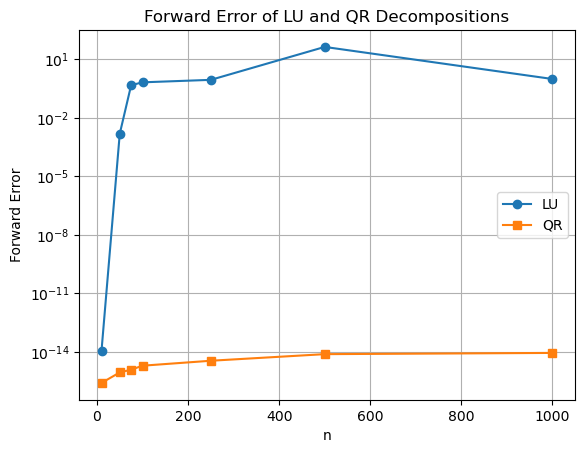

In [5]:
import numpy as np
from scipy.linalg import lu
import matplotlib.pyplot as plt
import random

def generate_W(n):
    W = np.identity(n)
    for i in range(1, n):
        for j in range(i):
            W[i, j] = -1
    W[:, -1] = 1
    return W

def generate_b(n):
    b = np.random.randn(n, 1)
    return b

def forward_substitution(L, b):
    y = np.zeros_like(b)
    for i in range(len(b)):
        y[i] = (b[i] - np.dot(L[i, :i], y[:i])) / L[i, i]
    return y

def back_substitution(U, y):
    x = np.zeros_like(y)
    for i in reversed(range(len(y))):
        x[i] = (y[i] - np.dot(U[i, i+1:], x[i+1:])) / U[i, i]
    return x



random.seed(1)

n_vals = [10, 50, 75, 100, 250, 500, 1000]
forward_errors_LU = []
forward_errors_QR = []

for n in n_vals:
    W = generate_W(n)
    b = generate_b(n)

    P, L, U = lu(W)
    Q, R = np.linalg.qr(W)

    y_lu = forward_substitution(L, b)
    x_lu = back_substitution(U, y_lu)

    y_qr = np.dot(Q.T, b)
    x_qr = back_substitution(R, y_qr)

    
    x_star = np.linalg.inv(W) @ b

    forward_error_LU = np.linalg.norm(x_star-x_lu) / np.linalg.norm(x_star)
    forward_error_QR = np.linalg.norm(x_star-x_qr) / np.linalg.norm(x_star)

    forward_errors_LU.append(forward_error_LU)
    forward_errors_QR.append(forward_error_QR)

plt.plot(n_vals, forward_errors_LU, marker='o', label='LU')
plt.plot(n_vals, forward_errors_QR, marker='s', label='QR')
plt.xlabel('n')
plt.ylabel('Forward Error')
plt.title('Forward Error of LU and QR Decompositions')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.show()